Name - Soumya Bairagya

Ph no  - +91 9860135277

E-mail - soumya.bairagya19@vit.edu

Store Monitoring

Problem Statement

An organization monitors several restaurants in the US and needs to monitor if the store is online or not. All restaurants are supposed to be online during their business hours. Due to some unknown reasons, a store might go inactive for a few hours. Restaurant owners want to get a report of the how often this happened in the past.
We want to build backend APIs that will help restaurant owners achieve this goal.
We will provide the following data sources which contain all the data that is required to achieve this purpose.
Data sources
We will have 3 sources of data
1.	We poll every store roughly every hour and have data about whether the store was active or not in a CSV. The CSV has 3 columns (store_id, timestamp_utc, status) where status is active or inactive. All timestamps are in UTC.
2.	We have the business hours of all the stores - schema of this data is store_id, dayOfWeek(0=Monday, 6=Sunday), start_time_local, end_time_local. These times are in the local time zone. If data is missing for a store, assume it is open 24*7.
3.	Timezone for the stores - schema is store_id, timezone_str. If data is missing for a store, assume it is America/Chicago. This is used so that data sources 1 and 2 can be compared against each other.

Data output requirement
We want to output a report to the user that has the following schema
store_id, uptime_last_hour, uptime_last_day, update_last_week, downtime_last_hour, downtime_last_day, downtime_last_week
1.	Uptime and downtime should only include observations within business hours.
2.	You need to extrapolate uptime and downtime based on the periodic polls we have ingested, to the entire time interval. 
    1.	eg, business hours for a store are 9 AM to 12 PM on Monday 
        1.	we only have 2 observations for this store on a particular date (Monday) in our data at 10:14 AM and 11:15 AM
        2.	we need to fill the entire business hours interval with uptime and downtime from these 2 observations based on some sane interpolation logic


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read DataFrame
data = pd.read_csv("store status.csv")

# no of csv files with row size
k = 2
size = 911040

for i in range(k):
	df = data[size*i:size*(i+1)]
	df.to_csv(f'store status_{i+1}.csv', index=False)

df_1 = pd.read_csv("store status_1.csv")
print(df_1.head())

df_2 = pd.read_csv("store status_2.csv")
print(df_2.head())


              store_id  status                   timestamp_utc
0  8419537941919820732  active  2023-01-22 12:09:39.388884 UTC
1    54515546588432327  active  2023-01-24 09:06:42.605777 UTC
2  8377465688456570187  active  2023-01-24 09:07:26.441407 UTC
3  5955337179846162144  active  2023-01-24 09:08:07.634899 UTC
4  1169347689335808384  active  2023-01-24 09:08:18.436854 UTC
              store_id  status                   timestamp_utc
0  7960433717803174215  active  2023-01-18 20:09:28.915388 UTC
1  7811780403049229937  active  2023-01-19 02:02:46.447352 UTC
2  1113154600772620212  active  2023-01-19 13:43:10.308856 UTC
3  3319035439600449966  active  2023-01-19 16:07:24.643137 UTC
4  2472327995226210764  active  2023-01-19 15:12:12.353576 UTC


In [3]:
data.count()

store_id         1822080
status           1822080
timestamp_utc    1822080
dtype: int64

In [4]:
1822080/2

911040.0

In [10]:
df1 = pd.read_csv("store status.csv")
df2 = pd.read_csv("Menu hours.csv")
df3 = pd.read_csv("bq-results-20230125-202210-1674678181880.csv")

In [26]:
df1.head()

,store_id,status,timestamp_utc
0,8419537941919820732,active,2023-01-22 12:09:39.388884 UTC
1,54515546588432327,active,2023-01-24 09:06:42.605777 UTC
2,8377465688456570187,active,2023-01-24 09:07:26.441407 UTC
3,5955337179846162144,active,2023-01-24 09:08:07.634899 UTC
4,1169347689335808384,active,2023-01-24 09:08:18.436854 UTC


In [27]:
df1.describe()

,store_id
count,1.822080e+06
mean,4.602054e+18
std,2.641361e+18
min,2.574063e+14
25%,2.326915e+18
50%,4.590731e+18
75%,6.845758e+18
max,9.222367e+18


In [28]:
df1.isnull().sum()

store_id         0
status           0
timestamp_utc    0
dtype: int64

In [30]:
df2.isnull().sum()

store_id            0
day                 0
start_time_local    0
end_time_local      0
dtype: int64

In [31]:
df3.isnull().sum()

store_id        0
timezone_str    0
dtype: int64

In [5]:
merged_data_1 = df1.merge(df2, on=["store_id"])
merged_data_1.head()
merged_data_1.to_csv(f'RestaurantData_1.csv', index=False)

In [6]:
merged_data_1.count()


store_id            11451872
status              11451872
timestamp_utc       11451872
day                 11451872
start_time_local    11451872
end_time_local      11451872
dtype: int64

In [7]:
merged_data_2 = merged_data_1.merge(df3, on=["store_id"])
merged_data_2.head()
merged_data_2.to_csv(f'RestaurantData_2.csv', index=False)


In [8]:
merged_data_2.count()

store_id            11450318
status              11450318
timestamp_utc       11450318
day                 11450318
start_time_local    11450318
end_time_local      11450318
timezone_str        11450318
dtype: int64

In [9]:
merged_data_2.isnull().sum()

store_id            0
status              0
timestamp_utc       0
day                 0
start_time_local    0
end_time_local      0
timezone_str        0
dtype: int64

Way2

In [14]:
merged_data_3 = df2.merge(df3, on=["store_id"])
merged_data_3.to_csv(f'RestaurantData_3.csv', index=False)

In [15]:
merged_data_3.count()

store_id            86021
day                 86021
start_time_local    86021
end_time_local      86021
timezone_str        86021
dtype: int64

In [16]:
merged_data_4 = merged_data_3.merge(df1, on=["store_id"])
merged_data_4.to_csv(f'RestaurantData_4.csv', index=False)

In [17]:
merged_data_4.count()

store_id            11450318
day                 11450318
start_time_local    11450318
end_time_local      11450318
timezone_str        11450318
status              11450318
timestamp_utc       11450318
dtype: int64

In [24]:
merged_data_2.store_id.count()

11450318

In [25]:
if (merged_data_2.store_id.count() == merged_data_4.store_id.count()):
    print ("Equal data")
else:
    print("Something wrong with data")

Equal data


In [5]:
df4 = pd.read_csv("RestaurantData_4.csv")

In [6]:
df5 = df4.drop(['timezone_str'],axis=1)

In [7]:
df5.head()

,store_id,day,start_time_local,end_time_local,status,timestamp_utc
0,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-20 05:37:32.091231 UTC
1,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-24 15:10:01.222494 UTC
2,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-19 00:35:26.427784 UTC
3,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-25 11:09:27.334577 UTC
4,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-21 02:07:42.020815 UTC


In [8]:
df5.isnull().sum()

store_id            0
day                 0
start_time_local    0
end_time_local      0
status              0
timestamp_utc       0
dtype: int64

In [11]:
dfch = df1.head()
dfch

,store_id,status,timestamp_utc
0,8419537941919820732,active,2023-01-22 12:09:39.388884 UTC
1,54515546588432327,active,2023-01-24 09:06:42.605777 UTC
2,8377465688456570187,active,2023-01-24 09:07:26.441407 UTC
3,5955337179846162144,active,2023-01-24 09:08:07.634899 UTC
4,1169347689335808384,active,2023-01-24 09:08:18.436854 UTC


In [10]:
dfch[['Date', 'UTC Time']] = dfch.timestamp_utc.str.split(" ", n=1, expand=True)

In [11]:
dfch.head()

,store_id,status,timestamp_utc,Date,UTC Time
0,8419537941919820732,active,2023-01-22 12:09:39.388884 UTC,2023-01-22,12:09:39.388884 UTC
1,54515546588432327,active,2023-01-24 09:06:42.605777 UTC,2023-01-24,09:06:42.605777 UTC
2,8377465688456570187,active,2023-01-24 09:07:26.441407 UTC,2023-01-24,09:07:26.441407 UTC
3,5955337179846162144,active,2023-01-24 09:08:07.634899 UTC,2023-01-24,09:08:07.634899 UTC
4,1169347689335808384,active,2023-01-24 09:08:18.436854 UTC,2023-01-24,09:08:18.436854 UTC


In [13]:
df5[['Date', 'UTC Time']] = df5.timestamp_utc.str.split(" ", n=1, expand=True)

In [14]:
df5.head()

,store_id,day,start_time_local,end_time_local,status,timestamp_utc,Date,UTC Time
0,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-20 05:37:32.091231 UTC,2023-01-20,05:37:32.091231 UTC
1,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-24 15:10:01.222494 UTC,2023-01-24,15:10:01.222494 UTC
2,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-19 00:35:26.427784 UTC,2023-01-19,00:35:26.427784 UTC
3,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-25 11:09:27.334577 UTC,2023-01-25,11:09:27.334577 UTC
4,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-21 02:07:42.020815 UTC,2023-01-21,02:07:42.020815 UTC


In [15]:
df5.isnull().sum()

store_id            0
day                 0
start_time_local    0
end_time_local      0
status              0
timestamp_utc       0
Date                0
UTC Time            0
dtype: int64

In [16]:
df5 = df5.drop(['timestamp_utc'],axis=1)

In [17]:
df5 = df5.drop(['UTC Time'], axis=1)

In [18]:
df5.head()

,store_id,day,start_time_local,end_time_local,status,Date
0,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-20
1,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-24
2,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-19
3,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-25
4,1481966498820158979,4,00:00:00,00:10:00,active,2023-01-21


In [19]:
df5.to_csv(f'RestaurantData_5.csv', index=False)

In [ ]:
# df5_active = df5.store_id(df5["status"] == "active")

Final Data must include

store_id, uptime_last_hour, uptime_last_day, update_last_week, downtime_last_hour, downtime_last_day, downtime_last_week

In [20]:
finaldf = pd.DataFrame(
    columns=["store_id", "uptime_last_hour", "uptime_last_day", "uptime_last_week", "downtime_last_hour", "downtime_last_day", "downtime_last_week"])


In [21]:
finaldf.head()

,store_id,uptime_last_hour,uptime_last_day,uptime_last_week,downtime_last_hour,downtime_last_day,downtime_last_week


In [22]:
finaldf.to_csv(f'RestaurantData_Final.csv', index=False)

Visualization

          store_id      day
store_id   1.00000  0.00057
day        0.00057  1.00000


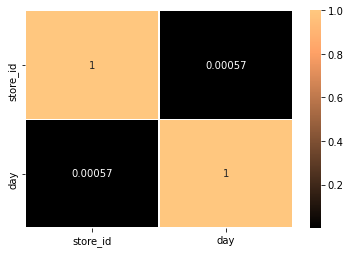

In [23]:
print(df5.corr())
sns.heatmap(df5.corr(),cmap="copper",annot=True,linewidths=0.2)

In [13]:
#pd.crosstab(df5.store_id, df5.day).plot(kind='bar'), pd.crosstab(df5.store_id, df5.day).plot(kind='line')

In [ ]:
#sns.countplot("day",hue="week",data=df5)

In [ ]:
#plt.pie("day",data=df5,labels="week",shadow=True,frame=True)
#plt.title("days active")
#plt.legend()

Predictions

In [ ]:
#X = df_train.drop(['Date'],axis=1)
#Y = df_train.status
#X_test = df_test
#from sklearn.model_selection import train_test_split
#X_train,X_check,y_train,y_check = train_test_split(X,Y,test_size=0.3)

In [ ]:
#print('Shape of X_train:',X_train.shape)
#print('Shape of X_check:',X_check.shape)
#print('Shape of X_test:',X_test.shape)

In [ ]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
'''

In [ ]:
'''
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_check,y_check)
'''

In [ ]:
'''
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train,y_train)
DTC.score(X_check,y_check)
'''

In [ ]:
'''
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC.score(X_check,y_check)
'''

In [ ]:
'''
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier'],
    'Score': [LR.score(X_check,y_check),RFC.score(X_check,y_check),DTC.score(X_check,y_check)]})
models.sort_values(by="Score")
'''